# Inaugural Project - MES

Overview over all the necessary packages that are required for solving the tasks.

In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import warnings
warnings.filterwarnings("ignore")

from inauguralproject import HouseholdSpecializationModelClass
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1 - Illustrate how $\frac{H_F}{H_M}$ changes when varying $\alpha$ and $\sigma$

The output of the model is $H_F$ and $H_M$. It represents the hours worked at home for male and female.
The (varying) inputs of the model are $\alpha$ and $\sigma$. $\alpha$ measures the importance of $H_F$ relative to $H_M$ in the consumption of overall home production. $\sigma$ is the elasticity of substitution.

For Question 1 and 2, the model is assumed to be discrete. Consequently, only predefined solutions for $H_F$, $H_M$ are possible.

Visualization of the dataFrame. The ratio of HF and HM is shown for varying alphas and sigmas. 
 
            alpha:0.25  alpha:0.5  alpha:0.75
sigma:0.5    0.545455        1.0    1.833333
sigma:1.0    0.307692        1.0    3.250000
sigma:1.5    0.214286        1.0    4.666667 



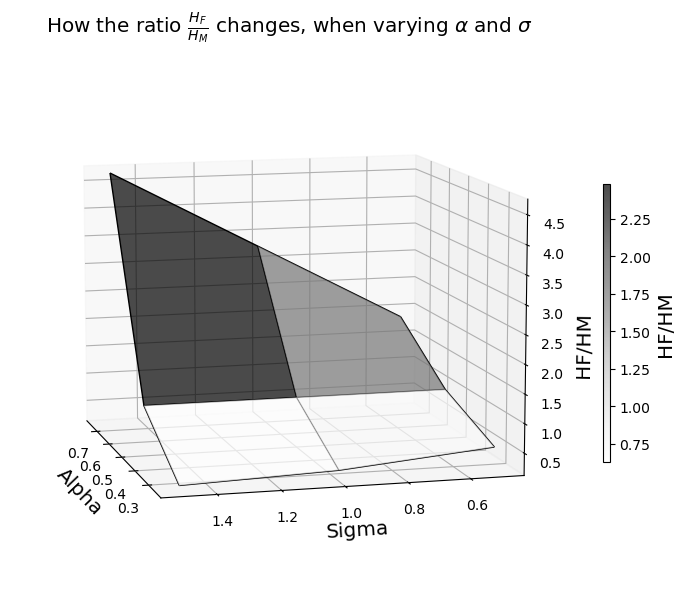

In [19]:
# Question 1

# A. Refer to the HouseholdSpecializationModelClass as model
model = HouseholdSpecializationModelClass()


# B. Create seperate lists for varying alphas and sigmas
varying_alpha = [0.25, 0.50, 0.75] 
varying_sigma = [0.50, 1.0, 1.5] 


# C. Create empty lists for the optimal values of HF, HM and the ratio HF/HM
HF_star = []
HM_star = []
HF_divided_HM_star = []


# D. Solve the model for varying alphas and sigmas
# D.1 Solve the model for the varying alphas and sigmas
for i in varying_sigma:
    model.par.sigma = i # insert the varying sigma's as model parameter
    for j in varying_alpha:
        model.par.alpha = j # insert the varying alpha's as model parameter
        opt = model.solve_discrete() # solve the model 

        # D.2 Rename optimal solutions to HF and HM
        HF = opt.HF
        HM = opt.HM

        # D.3 Create the ratio
        HF_divided_HM = opt.HF/opt.HM 

        # D.4 Append the optimal solutions to the prior defined (empty) lists
        HF_star.append(HF)
        HM_star.append(HM)
        HF_divided_HM_star.append(HF_divided_HM)


# E. Create a DataFrame out of the results
# E.1 Split the list HF_divided_HM_star into three seperate lists (with three elements each)
chunk_size = 3 
chunks = [HF_divided_HM_star[i:i + chunk_size] for i in range(0, len(HF_divided_HM_star), chunk_size)] 

# E.2 Create the dataFrame (with the three seperate lists)
data1 = [chunks[0], chunks[1], chunks[2]]
dataFrame1 = pd.DataFrame(data1, columns = ['alpha:0.25', 'alpha:0.5', 'alpha:0.75'], index = ['sigma:0.5', 'sigma:1.0', 'sigma:1.5'])

# E.3 Print the DataFrame for the results
print('Visualization of the dataFrame. The ratio of HF and HM is shown for varying alphas and sigmas.', '\n', '\n', dataFrame1, '\n')


# F. Create a 3D plot of the results
# F.1 Convert the varying alpha and sigma lists into NumPy arrays
alpha_array = np.array(varying_alpha)
sigma_array = np.array(varying_sigma)

# F.2 Create a meshgrid from the alpha and sigma arrays
alpha_mesh, sigma_mesh = np.meshgrid(alpha_array, sigma_array)

# F.3 Convert the HF/HM list into a NumPy array and reshape it to match the meshgrid shape
hf_hm_array = np.array(HF_divided_HM_star).reshape(alpha_mesh.shape)

# F.4 Create a figure and axis
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

# F.5 Plot the surface with shading
# F.5.1 Create the Plot, Input the arrays and set the color
ax.plot_wireframe(alpha_mesh, sigma_mesh, hf_hm_array, color='black', linewidth=1)
surface = ax.plot_surface(alpha_mesh, sigma_mesh, hf_hm_array, cmap='Greys', alpha=0.7, shade=True)
cbar = fig.colorbar(surface, ax=ax, shrink=0.4, aspect=40)

# F.5.2 Set the axis, labels and titles
cbar.set_label('HF/HM', size='x-large')
ax.set_title(r"How the ratio $\frac{H_F}{H_M}$ changes, when varying $\alpha$ and $\sigma$", size='x-large')
ax.set_xlabel('Alpha', size='x-large')
ax.set_ylabel('Sigma', size='x-large')
ax.set_zlabel('HF/HM', size='x-large')
ax.view_init(elev=10, azim=165)

# F.5.3 Show the plot
plt.show(block=False)

For an increasing $\alpha$, the home hours worked for female increase relative to the hours worked home by male. Thus, the ratio $\frac{H_F}{H_M}$ increases. The reason is, that women get more productive relative to men.

For an increasing $\sigma$, the results are ambigious. If $\alpha$ is on a low level ($\alpha = 0.25$), then an increase in $\sigma$ results into a decrease in the ratio of $\frac{H_F}{H_M}$. Then, home working hours for men are relatively increasing compared to women because they are more productive. If $\alpha$ is on a high level, then an increase in $\sigma$ results into an increase in $H_F$ relative to $H_M$. Analogue, women are more productive relative to men, thus there home working hours are relatively increasing.

# Question 2 - Plot $log \frac{H_F}{H_M}$ against $log \frac{w_F}{w_M}$ for varying $w_F$

Compared to Question 1, $\alpha$ and $\sigma$ are assumed to be fixed again at $\alpha = 0.5$ and $\sigma = 1$. Instead, $w_F$ varies discretely as input. $w_F$ corresponds to the female wages. Accordingly, the output $H_F$, $H_M$ and their log ratio varies. 

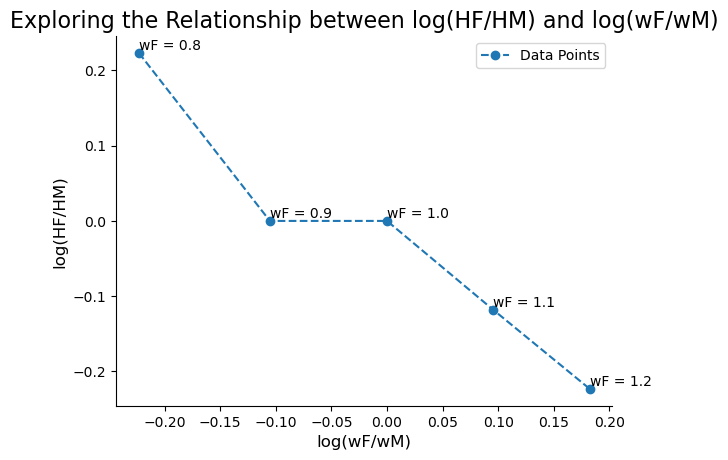

In [24]:
# Question 2

# A. Refer to the HouseholdSpecializationModelClass as model
model = HouseholdSpecializationModelClass()


# B. Create empty lists for log HF/HM and log WF/WM
log_HF_HM_disc = []
log_WF_WM_disc = []


# C. Solve the Model discretely for varying wF
for wF in model.par.wF_vec:
      model.par.wF = wF
      discrete = model.solve_discrete() # solve the model 

   # C.1 Append the ratio of optimal solutions of HF and HM to the empty list
      log_HF_HM_disc.append(math.log(discrete.HF / discrete.HM))

   # C.2 Append the ratio of input values of wF and wM to the empty list
      log_WF_WM_disc.append(math.log(wF / 1))


# D. Create a Figure
model.plot_line(log_WF_WM_disc, log_HF_HM_disc)

For assuming $w_M$ fixed, a discrete increase in $w_F$ results into an increased ratio $log \frac{w_F}{w_M}$. The increased relative wage ratio means that female labor is less demanded than mens labor due the increased wages. Thus, mens home working hours increase relative to women home working hours. This translates into a decreasing ratio $log \frac{H_F}{H_M}$.

# Question 3 - Plot $log \frac{H_F}{H_M}$ against $log \frac{w_F}{w_M}$ for varying $w_F$

For this exercise, the model is assumed to be continous. All possible realisations of $H_F$ and $H_M$ are possible based on variations of the female wages $w_F$. To solve this model, we use the new continous solver. 

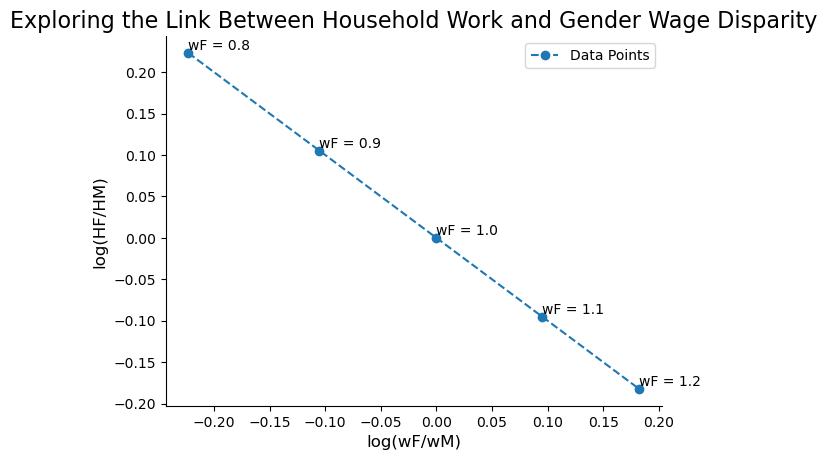

In [21]:
# Question 3

# A. Refer to the HouseholdSpecializationModelClass as model
model = HouseholdSpecializationModelClass()


# B. Create empty lists for output variables and varying wFs
log_HF_HM_cont = []
log_WF_WM_cont = []


# C. Solve the Model continously for varying wF
for wF in model.par.wF_vec:
   
   # C.1 Solve the model continously for varying wFs
   model.par.wF = wF
   model.solve_continous()

   # C.2 Append the ratio of optimal solutions of HF and HM to the empty list
   log_HF_HM_cont.append(math.log(model.sol.HF / model.sol.HM))

   # C.3 Append the ratio of input values of wF and wM to the empty list
   log_WF_WM_cont.append(math.log(wF / 1))


# D. Plot the log ratios
model.plot_line(log_WF_WM_cont, log_HF_HM_cont)

For assuming $w_M$ fixed, a discrete increase in $w_F$ results into an increased ratio for $log \frac{w_F}{w_M}$. The increased relative wage ratio means that female labor is less demanded than mens labor due the increased wages. Thus, mens home working hours increase relative to women home working hours. This translates into a decreasing ratio $log \frac{H_F}{H_M}$.

In the continous case, we allow for $H_F$ and $H_M$ to reflect continous values based on the optimization. Thus, the ratio $log \frac{H_F}{H_M}$ follows the expectation of a linear decrease, assuming $log \frac{w_F}{w_M}$ to increase. Therefore, the results from discrete case differ to the continous case.

# Question 4

The optimal values are: Alpha =  0.9820094105820354 and Sigma =  0.1
We arrive at: beta0 =  0.39957318397042535 and beta1 =  -0.09990777307761266
The squared deviation from data moments is in this case: 1.9067772831492966e-07


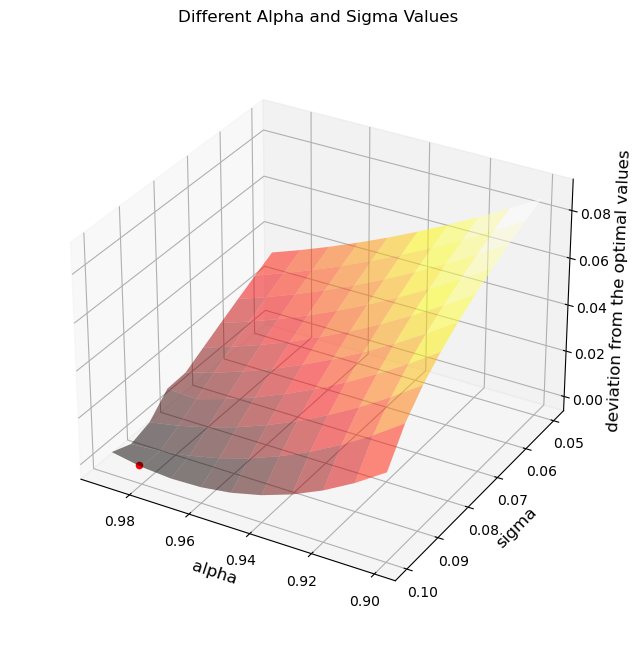

In [22]:
# Question 4

# A. Refer to the HouseholdSpecializationModelClass as model
model = HouseholdSpecializationModelClass()


# B. Manually set alpha and sigma to narrow the bounds and define the true values of beta 1 and beta 2
alpha = 0.9
sigma = 0.1
beta0_true = 0.4
beta1_true = -0.1


# C. Loop over the different values of wF
model.solve_wF_vec()


# D. Run the function run_regression
model.run_regression()


# E. Feed narrow bounds into optimizer:
bounds = ((0.9, 1), (0, 0.1))
model.estimate()


# F. Calculate the squared deviation
result = ((beta0_true - model.sol.beta0)**2 + (beta1_true - model.sol.beta1)**2)


# G. Print all relevant results
print("The optimal values are: Alpha = ", model.par.alpha, "and Sigma = ", model.par.sigma)
print("We arrive at: beta0 = ", model.sol.beta0, "and beta1 = ", model.sol.beta1)
print(f'The squared deviation from data moments is in this case: {result}')


# F. Set up the Graph

# F.1 Define the values and value spaces
alphas = np.linspace(0.90,0.99,10)
sigmas = np.linspace(0.05,0.1,10)

# F.2 Set initial values
alpha = 0.9
sigma = 0.1
beta0_true = 0.4
beta1_true = -0.1


deviation_vec = []


# F.3 Create the values for the deviations
for i, alpha in enumerate(alphas):   # loop over alpha
    for j, sigma in enumerate(sigmas):   # loop over sigma
        model.par.alpha = alpha
        model.par.sigma = sigma
        model.par.wF = wF
        model.solve_wF_vec()
        model.run_regression()
        deviation_value = ((0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2)
        if deviation_value > 0:   # only include non-negative deviations
            deviation_vec.append(deviation_value)

deviations = np.array(deviation_vec).reshape(len(alphas), len(sigmas))


# F.4 Creates grid of alpha and sigma values
alpha_grid, sigma_grid = np.meshgrid(alphas, sigmas)


# F.5 Plot the values
fig = plt.figure(figsize=(10,8))


# F.6 Set plot parameters
ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=120)
ax.dist = 11
ax.plot_surface(alpha_grid, sigma_grid, deviations, cmap='hot', alpha = 0.5)
ax.scatter([0.982], [0.099], [0], color="red")
ax.set_title('Different Alpha and Sigma Values', fontsize=12)
ax.set_xlabel('alpha', fontsize=12)
ax.set_ylabel('sigma', fontsize=12)
ax.set_zlabel('deviation from the optimal values', fontsize=12)
plt.show()


Economic Interpretation of the results:

Model fit with the data: 
Siminski and Yetsenga (2022) perform a data driven regression analysis and obtained the results beta0:0.4 and beta1:-0.1. Using our model driven approach, we obtained beta0: 0.3996 and beta1: -0.0999. Altough we used their results at a starting point for our analysis, we arrived at almost the same results which speak in favor of the specification of the model in line with the data.

Economic intepretation of beta0 and beta1:
If the ratio log(HF/HM) is negative, men work relatively more at home than women. Analogue implications hold for a positive ratio.

beta0:
For a positve beta0 women work c.p. relatively more than men at home. Vice versa holds for a negative beta0. Accordingly, an increase in beta0 translates into an extend of home working hours for women relative to men. As our model implies a beta0 of 0.3996 we conclude that generally women tend to work relatively more at home than men. The realisation of 0.4 shows the extent of this effect.

beta1: 
The estimate of beta1 shows to what extent the log(wF/wM) influences the realisation of log(HF/HM). For a beta1 of 0 the log ratio between the wages has no effect on the log ratio of wages. According to our model we arrive at a negative beta1 of -0.0999 which suggest that an relative increase in wages for women leads to a relative decrease of women's home working ours. This behavior could correspond to the so-called "income effect". Hence an increase in the relative wage for women implys that they have to work less at home to receive the same amount of income prior to the change. Consequently they choose to decrease the home working hours what in turn reduces the log ratio of wages.

# Question 5 - Extension of the Model

For our model extension, we set $\alpha = 0.5$ and $\sigma = 1$ again. Our extension idea is, that female home working hours $H_F$ are restricted to a certain value. For the upcoming analysis, we vary $H_F \in [1, 2, 3, 4]$. The restriction of working hours for females can have multiple reasons. For example, the woman of interest may be involved in child rearing, which limits working hours. 

In this case, we set the boundaries for $H_F$ below the optimal $H_F$ values from question 3. Thus, the optimal ratio of $\frac{H_F}{H_M}$ without constraints cannot be reached any more, and men have to work more than "optimal". Additionally, we vary $w_F \in [0.8, 0.9, 1.0, 1.1, 1.2]$ again, to see how an increase in $w_F$ enters the system for the different boundaries.

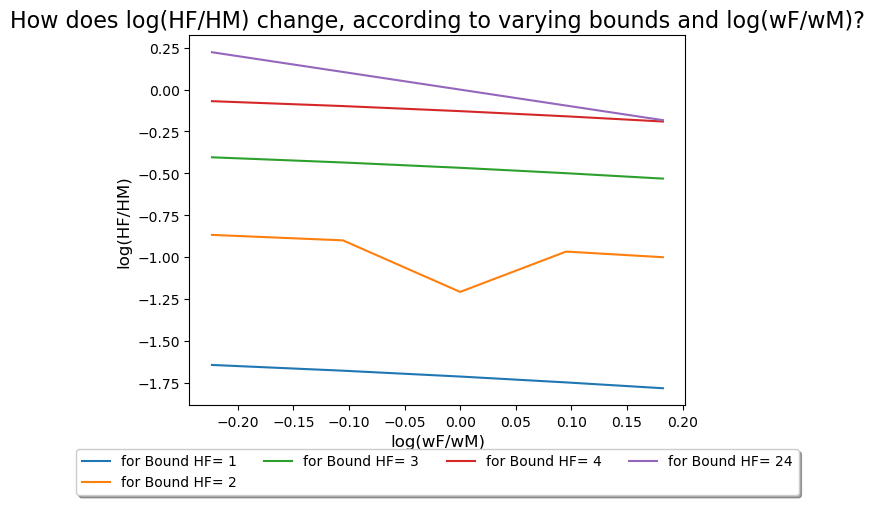

In [23]:
# Question 5

# A. Refer to the HouseholdSpecializationModelClass as model
model = HouseholdSpecializationModelClass()


# B. Setting the bounds for female
bound_female = [1, 2, 3, 4, 24]


# C. Create an empty figure
fig, ax = plt.subplots()


# D. Run solve_continous_extension
# D.1 Run the solver for each boundary
for i in bound_female:
   
   # D.2 Create empty lists for output variables and varying wFs
   log_HF_HM_extension = []
   log_WF_WM_extension = []
   
   # D.3 For each boundary, vary wF
   for wF in model.par.wF_vec:
      model.par.wF = wF
      model.solve_continous_extension(i)

      # D.4 Append the resulting ratios to the empty list
      log_WF_WM_extension.append(math.log(wF / 1))
      log_HF_HM_extension.append(math.log(model.sol.HF / model.sol.HM))
   
   # D.5 Plot the graph, where each boundary corresponds to a line
   ax.plot(log_WF_WM_extension, log_HF_HM_extension, label=f'for Bound HF= {i}')


# E. Customize the figure
# E.1 Set title and labels
ax.set_xlabel('log(wF/wM)', fontsize=12)
ax.set_ylabel('log(HF/HM)', fontsize=12)
ax.set_title('How does log(HF/HM) change, according to varying bounds and log(wF/wM)?', fontsize = 16)

# E.2 Display legend below the graph
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)

# E.3 Display the plot
plt.show()

The purple line represents the scenario without any boundary for $H_F$ (see the results from Question C), while the other lines impose a varying boundary for $H_F$.

Results of the analysis:
First, an increasing bound (move the bound from 4 to 1) leads to a decline of the ratio of $log \frac{H_F}{H_M}$. Due to the bound increase for women, men have to step in ($H_M$ increases) to remain a more or less constant $H$. Those two movements result in an decrease of the ratio.

Second, even within each boundary, an increase in $w_F$ once again reduces the productivity of women working hours relative to mens. So the ratio decreases even further for increasing $w_F$. Even though the boundary allows women to work in a less optimal amount, the expansion of $w_F$ results in women to work even less than the boundary allows. But the slope of the decrease is in every scenario flatter than the baseline situation. Thus, the substitution from women to men takes place less due to the initial boundary.

Third, for $w_F = 1.2$, the purple line ($H_F=24$) and the red line ($H_F=4$) has an intercept at about $log \frac{w_f}{w_M} = 0.18$. This means, that the optimal amount of $H_F$ and $H_M$ are the same in both scenarios. Even though the women home working hours are still restricted, the optimal amount of $H_F$ seems to be the same as in the unrestricted case. 

For the boundary $H_F = 2$, we cannot say why there is a change in slope at $log \frac{w_F}{w_M}=0$. $log \frac{w_F}{w_M}=0$ implies, that $w_F=w_M$, but we don't know why this should result in a sudden steeper substitution from women to men, while afterwards the ratio is even increasing. 